# BIG DATA PROJECT Group-8
### CALIFORNIA HOUSE PRICE PREDICTION
#### REDDY SAI KRISHNA SANDA - 801313095
#### DINESH REDDY CHINNAMALLAIAHGARI - 801312365
#### KOUSIK VARMA DANDU - 801316591
#### SHESHI REKHA GUNTUKA - 801312506

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [2]:
#importing dataset into pandas as dataframe
DataFrame = pd.read_csv(r'housing.csv')
ds=DataFrame     #defining ds as a dataframe

In [3]:
ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [4]:
ds.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [5]:
#displays information of the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
# display top 5 rows in the dataset
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
# display last 5 rows in the dataset
ds.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [8]:
# display the dimentions of the dataset
ds.shape

(20640, 10)

In [9]:
#displays the columns in the dataset
list(ds.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [10]:
#displays the number of null values in the repective columns
ds.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
#displays the number of unique values in the respective columns
ds.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [12]:
#displays duplicate values in the column
ds.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [13]:
#Displays statistical values of dataset
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


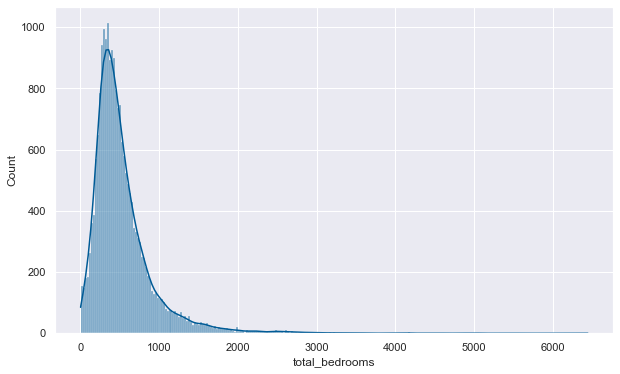

In [14]:
plt.figure(figsize= (10, 6))
sns.histplot(ds['total_bedrooms'], color = '#005b96', kde= True);

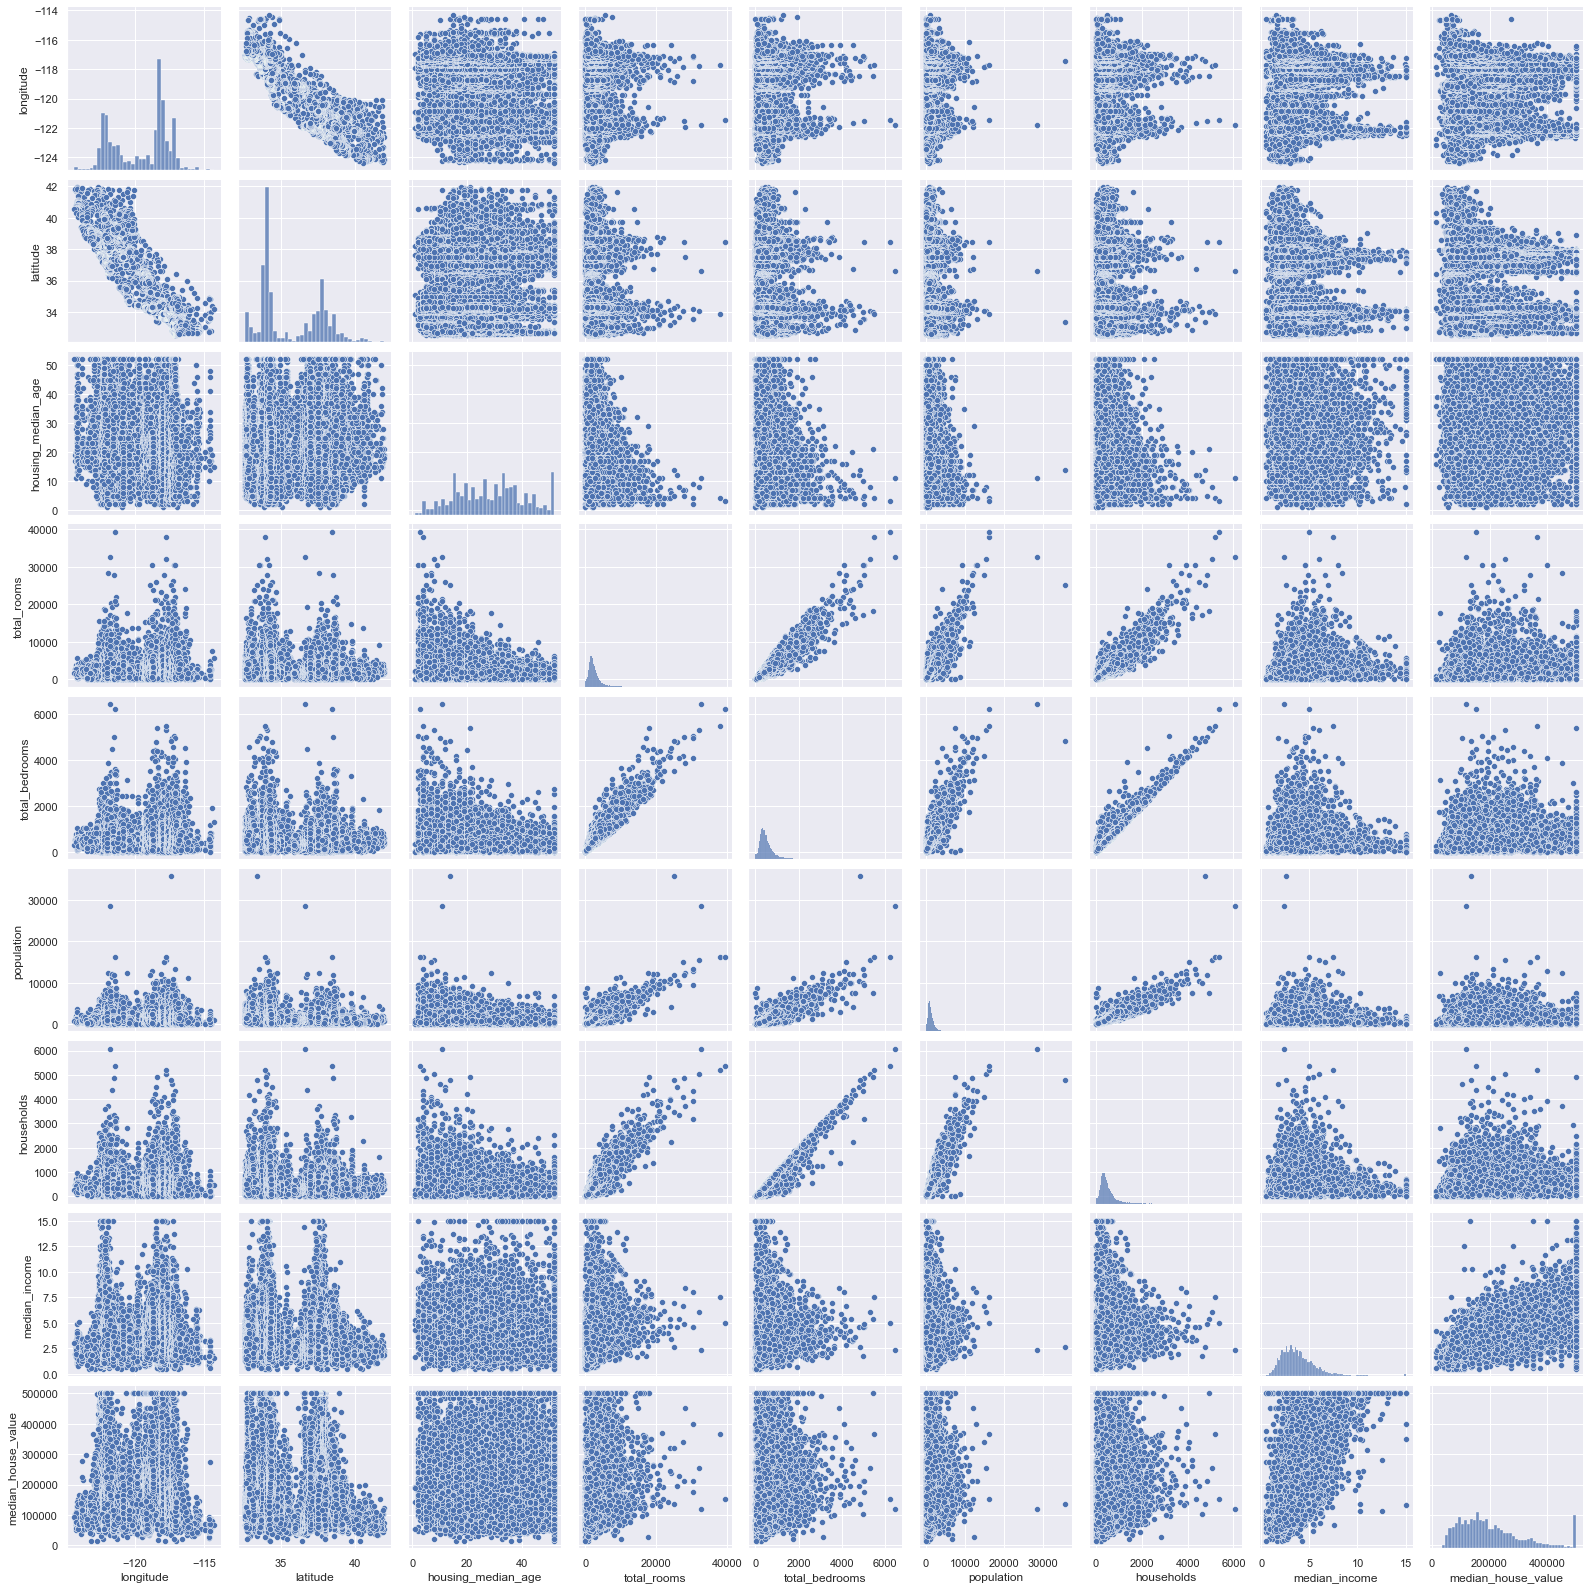

In [15]:
sns.pairplot(ds, diag_kind="hist")

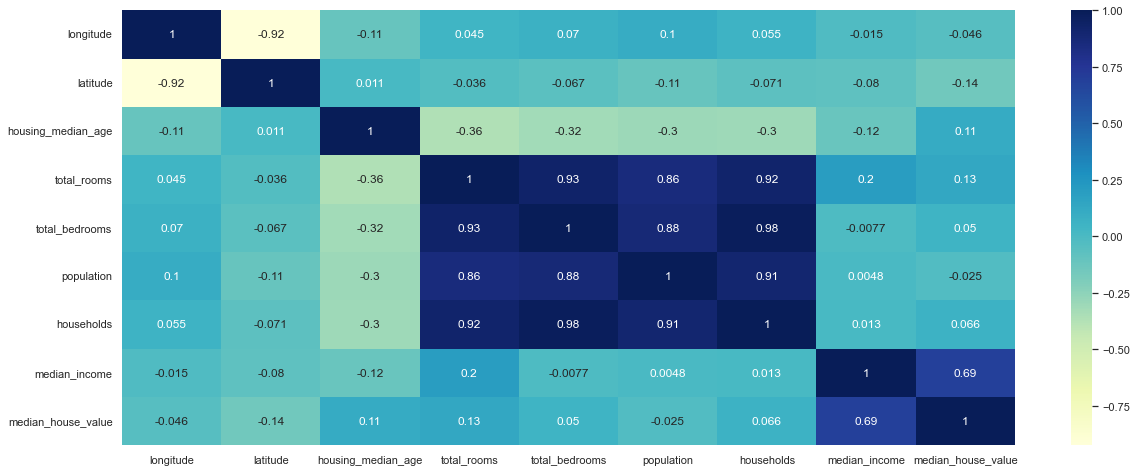

In [16]:
plt.figure(figsize= (20, 8))
sns.heatmap(ds.corr(), annot= True, cmap='YlGnBu')
plt.show()

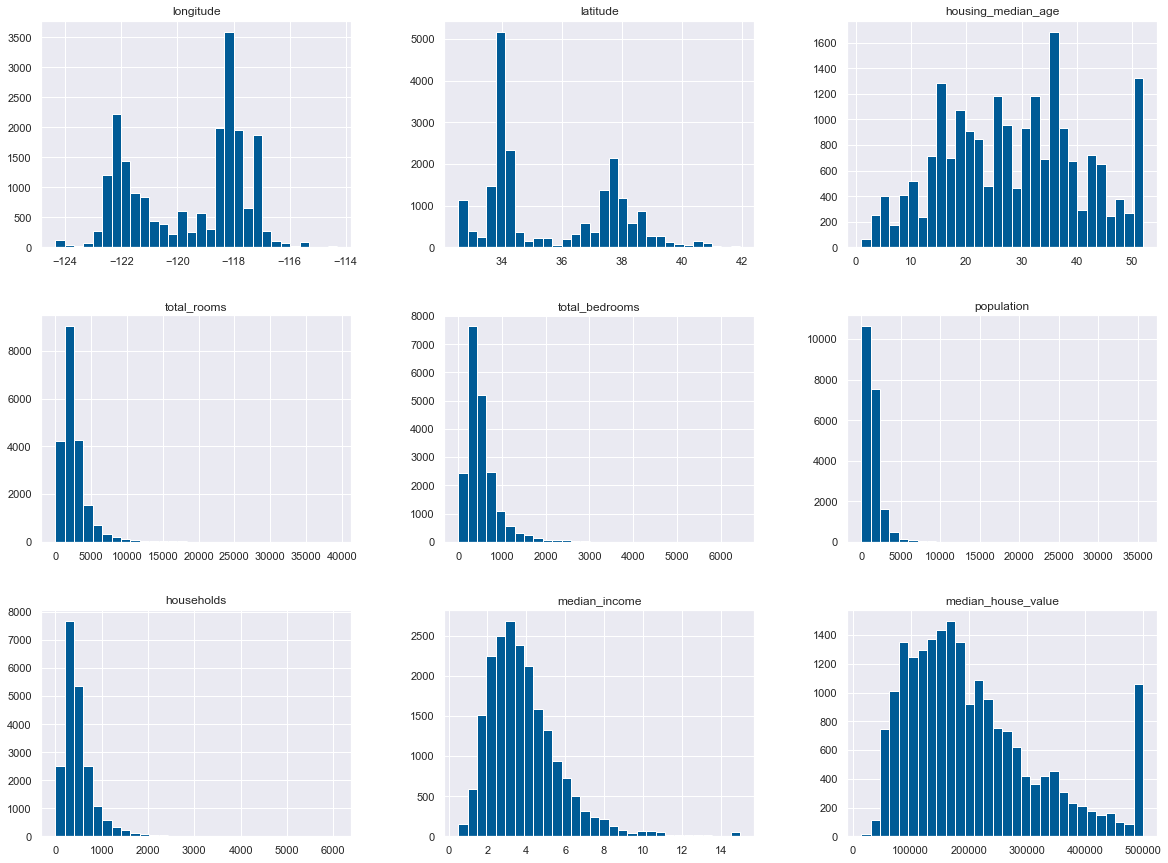

In [17]:
ds.hist(bins = 30, figsize=(20, 15), color = '#005b96');

In [18]:
ds['median_house_value'].skew()

0.9777632739098341

We can clearly see that lot of our features are skewed. Therefore, we will have to deal with it later when we will do feature transformation

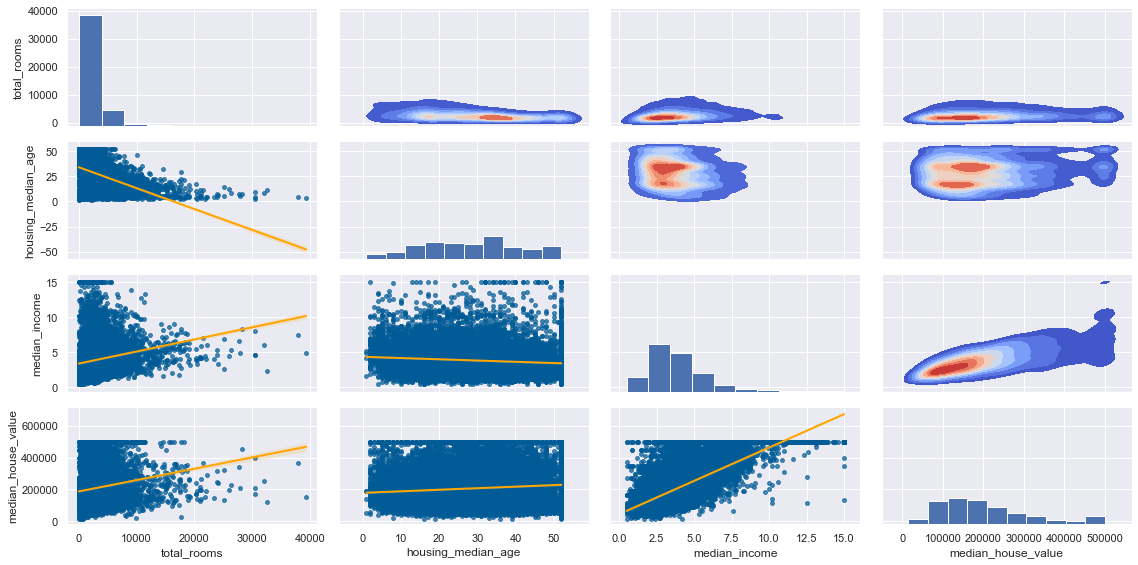

In [19]:
grid = sns.PairGrid(ds, vars=['total_rooms', 'housing_median_age', 'median_income', 'median_house_value'],
                    height=2, aspect = 2)

grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'coolwarm', shade = True)

plt.show()

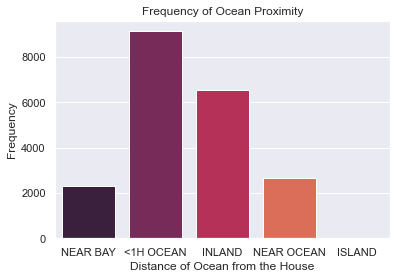

<Figure size 1800x1080 with 0 Axes>

In [20]:
from matplotlib import pyplot as plt
sns.countplot(data=ds, x="ocean_proximity",  palette="rocket").set(
    title = "Frequency of Ocean Proximity",
    xlabel = "Distance of Ocean from the House",
    ylabel = "Frequency"
)
plt.figure(figsize=(25,15))
plt.show()

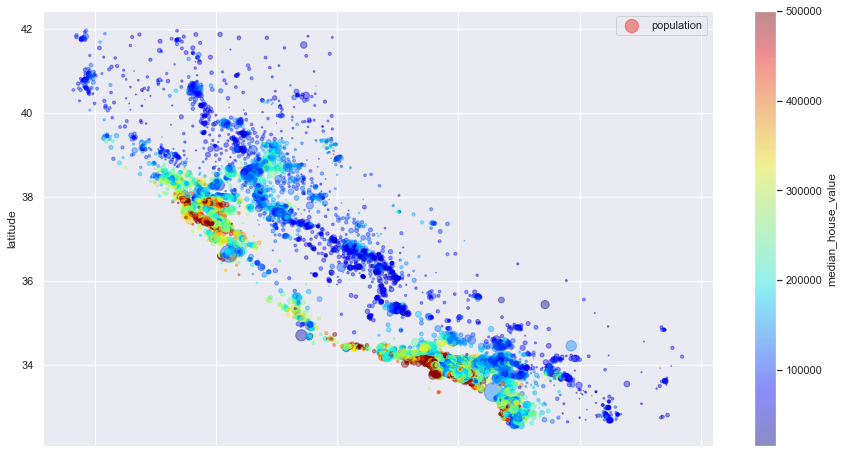

In [21]:
ds.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=ds["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

# Data Preparation

Converting Unstructured Data into Structured Data

In [22]:
# displays missing values in the dataset
missing_values_ds = ds.isnull().sum()
print(missing_values_ds)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


<AxesSubplot:>

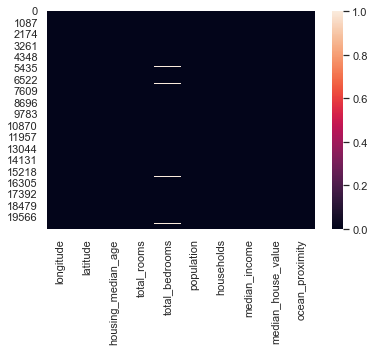

In [23]:
sns.heatmap(ds.isnull())

In [24]:
ds['total_bedrooms'].fillna(ds['total_bedrooms'].median(), inplace= True)

In [25]:
# displays missing values after dropping
ds.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

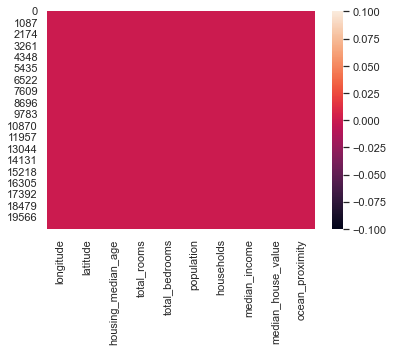

In [26]:
# displays heatmap for null values
sns.heatmap(ds.isnull())

Feature Engineering

In [27]:
ds['bed_per_room'] = ds['total_bedrooms'] / ds['total_rooms']

In [28]:
X = ds.drop(['median_house_value'], axis=1)
y = np.log(ds.median_house_value) # Applying log transformation

Feature Transformations

In [29]:
skew_ds = pd.DataFrame(X.select_dtypes(np.number).columns, columns= ['Feature'])
skew_ds['Skew'] = skew_ds['Feature'].apply(lambda feature: skew(X[feature]))
skew_ds['Abs_Skew'] = skew_ds['Skew'].apply(abs)
skew_ds['Skewed'] = skew_ds['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_ds

,Feature,Skew,Abs_Skew,Skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


In [30]:
skewed_columns = skew_ds[skew_ds['Abs_Skew'] > 0.5]['Feature'].values
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [31]:
for column in skewed_columns:
    X[column] = np.log(X[column])

Encoding

In [32]:
encoder=LabelEncoder()
X['ocean_proximity']=encoder.fit_transform(X['ocean_proximity'])

Scaling

In [33]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41,6.779922,4.859812,5.774552,4.836282,2.119287,3,-1.920110
1,-122.22,37.86,21,8.867709,7.008505,7.783641,7.037028,2.116424,3,-1.859204
2,-122.24,37.85,52,7.290975,5.247024,6.206576,5.176150,1.982022,3,-2.043951
3,-122.25,37.85,52,7.149917,5.459586,6.324359,5.389072,1.730434,3,-1.690331
4,-122.25,37.85,52,7.394493,5.634790,6.336826,5.556828,1.347086,3,-1.759704


In [34]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)

Spliting Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Random Forest

In [36]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.23349302277226816
R-square: 0.8320248771013234


## CatBoost

In [38]:
catboost = CatBoostRegressor(verbose= 0)
catboost.fit(X_train, y_train)
predictions_cb = catboost.predict(X_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_cb))
r2 = r2_score(y_test, predictions_cb)
print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.2205112504809162
R-square: 0.8501838416230987


lets combine these 2 models to get the final predictions

In [45]:
finalpredictions = (
    0.50 * predictions_cb+
    0.50 * predictions_rf
)

In [46]:
rmse = np.sqrt(mean_squared_error(y_test, finalpredictions))
r2 = r2_score(y_test, finalpredictions)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.220358533999795
R-square: 0.850391282049255


In [47]:
finalpredictions

array([10.89781877, 11.35205091, 13.05982847, ..., 13.13563565,
       11.22171651, 12.06914663])

In [48]:
finalpredictions = np.exp(finalpredictions)
y_test = np.exp(y_test)

In [49]:
pd.DataFrame({'Actual': y_test, 'Predicted': finalpredictions.round(2)})

,Actual,Predicted
20046,47700.0,54058.32
3024,45800.0,85139.89
15663,500001.0,469690.13
20484,218600.0,249212.63
9814,278000.0,256614.17
...,...,...
15362,263300.0,231936.78
16623,266800.0,228325.03
18086,500001.0,506680.37
2144,72300.0,74735.95


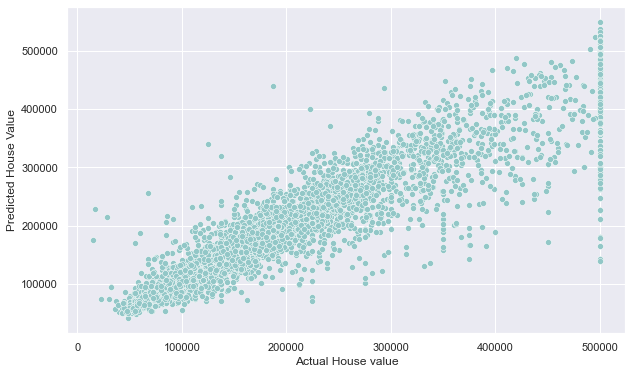

In [62]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= finalpredictions, color= '#92C7C7')
plt.xlabel('Actual House value')
plt.ylabel('Predicted House Value')
plt.show()

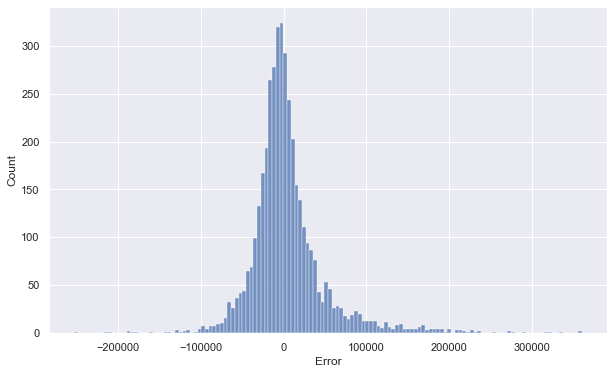

In [68]:
resid = y_test - finalpredictions
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');

Distribution of errors seems like normal, so our model is doing a decent job.